In [65]:
using Plots
using NonlinearSolve

In [66]:
# Define functions for calculating friction factor
function colebrook(Re, eD)
    """Solves the Colebrook equation for friction factor using numerical methods."""
    function f_colebrook(f, p)  # Function must return a vector
        [1 / sqrt(f[1]) + 2 * log10(eD / 3.7 + 2.51 / (Re * sqrt(f[1])))]
    end
    
    # Create and solve the nonlinear problem
    prob = NonlinearProblem(f_colebrook, [0.01], nothing)
    result = solve(prob, NewtonRaphson())
    return result.u[1]
end

colebrook (generic function with 1 method)

In [67]:
function laminar_friction_factor(Re)
    """Calculates the friction factor for laminar flow."""
    return 64 / Re
end

laminar_friction_factor (generic function with 1 method)

In [68]:
# Generate Data
Re_values = 10 .^ range(3, 8, length=500)
eD_values = [0, 0.0001, 0.001, 0.01, 0.02, 0.04, 0.05];

In [ ]:
# three-term approximation
approx3(t) = 1/(-2*log10(18.6/t) + 1.74-2*log10(-2*log10(18.6/t)))^2 

approx2 (generic function with 1 method)

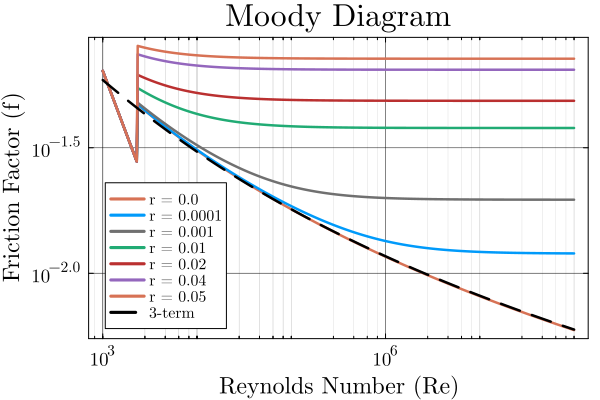

"/home/belster/JuliaFiles/Aero/hw3/Aero_HW3_Prob1_Moody.pdf"

In [76]:
# Create the plot with logarithmic scales
theme(:dao::Symbol)

p = plot(
    xlabel="Reynolds Number (Re)",
    ylabel="Friction Factor (f)",
    title="Moody Diagram",
    xscale=:log10,
    yscale=:log10,
    grid=true,
    minorgrid=true,
    legend=:bottomleft,
    titlefontsize=20,
    tickfontsize=12,
    legendfontsize=10,
    yguidefontsize=15,
    xguidefontsize=15,
    bottom_margin=2*Plots.mm
)

# Calculate and plot for each roughness value
for eD in eD_values
    f_values = Float64[]
    for Re in Re_values
        if Re < 2300
            push!(f_values, laminar_friction_factor(Re))
        else
            push!(f_values, colebrook(Re, eD))
        end
    end
    plot!(p, Re_values, f_values, label="r = $eD", line=(2.5, :solid))
end

plot!(p, Re_values, approx3.(Re_values), label="3-term", line=(2.5, :dash, ), lc=:black)

# Display the plot
display(p)
savefig(p, "Aero_HW3_Prob1_Moody.pdf")